In [1]:
import pandas as pd 

In [2]:
import statistics

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
# it contains classification results by using university data
filename = "results/result_2019-12-10_18-46-11/classification_AAUP_results.csv"

In [6]:
data = pd.read_csv(filename, keep_default_na=False)

In [7]:
data.head()

,task_name,gold_standard_file,model_name,model_configuration,accuracy
0,Classification,AAUP,KNN,K=3,0.643696
1,Classification,AAUP,KNN,K=3,0.629621
2,Classification,AAUP,KNN,K=3,0.638131
3,Classification,AAUP,KNN,K=3,0.633973
4,Classification,AAUP,KNN,K=3,0.632804


In [8]:
# the best method able to manage university data
best_result = data[data.accuracy==max(data.accuracy)]

In [9]:
best_result

,task_name,gold_standard_file,model_name,model_configuration,accuracy
90,Classification,AAUP,SVM,C=10.0,0.713471


In [10]:
# the worst method in working with university data
worst_result = data[data.accuracy==min(data.accuracy)]

In [11]:
worst_result

,task_name,gold_standard_file,model_name,model_configuration,accuracy
12,Classification,AAUP,C45,,0.528502


In [12]:
models = data.model_name.unique()

In [13]:
models_df = pd.DataFrame([], columns=['id', 'approach', 'conf', 'min', 'max', 'mean', 'standard_dev'])

In [14]:
# it calculates the min, max, average and standard deviation for each model and, if more configuration are tested, for each conf
for m in models:
    model_data = data[data['model_name']==m]
    model_configurations = model_data.model_configuration.unique()

    if len(model_configurations)>1:
        for conf in model_configurations:
            model_data_conf = model_data[model_data['model_configuration']==conf]
            model_accuracy = model_data_conf.accuracy
            min_accuracy = min(model_accuracy)
            max_accuracy = max(model_accuracy)
            mean_accuracy = sum(model_accuracy)/len(model_accuracy)
            stdev_accuracy = statistics.stdev(model_accuracy)
            model_id = m+' '+conf
            
            values = {'id' : model_id, 'approach' : m, 'conf' : conf, 'min':min_accuracy, 'max':max_accuracy, 'mean':mean_accuracy, 'standard_dev':stdev_accuracy}
            models_df = models_df.append(values, ignore_index=True)
            
    else:
        conf = model_configurations[0]
            
        model_accuracy = model_data.accuracy
        min_accuracy = min(model_accuracy)
        max_accuracy = max(model_accuracy)
        mean_accuracy = sum(model_accuracy)/len(model_accuracy)
        stdev_accuracy = statistics.stdev(model_accuracy)
        model_id = m+' '+conf
    
        values = {'id' : model_id, 'approach' : m, 'conf' : conf, 'min':min_accuracy, 'max':max_accuracy, 'mean':mean_accuracy, 'standard_dev':stdev_accuracy}
        models_df = models_df.append(values, ignore_index=True)   

In [15]:
models_df

,id,approach,conf,min,max,mean,standard_dev
0,KNN K=3,KNN,K=3,0.629621,0.643980,0.637196,0.004761
1,C45,C45,,0.528502,0.571957,0.555628,0.013034
2,NB,NB,,0.582938,0.591222,0.587488,0.003074
3,SVM C=0.001,SVM,C=0.001,0.545788,0.545788,0.545788,0.000000
4,SVM C=0.01,SVM,C=0.01,0.545788,0.545788,0.545788,0.000000
5,SVM C=0.1,SVM,C=0.1,0.545788,0.545788,0.545788,0.000000
6,SVM C=1.0,SVM,C=1.0,0.639279,0.646106,0.641633,0.002115
7,SVM C=10.0,SVM,C=10.0,0.697154,0.713471,0.707585,0.005685
8,SVM C=100,SVM,C=100,0.639266,0.660087,0.652649,0.006307
9,SVM C=1000,SVM,C=1000,0.645871,0.665603,0.655751,0.006515


(0, 1)

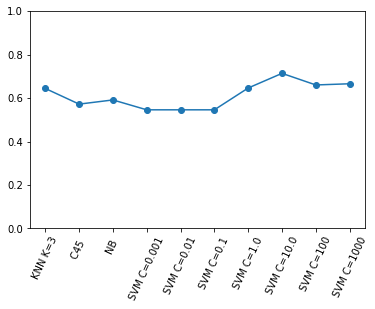

In [16]:
# it plots the max values for the accuracy
plt.plot(models_df.id, models_df['max'], marker = 'o')
plt.xticks(rotation=65)
#plt.grid(True)
plt.ylim((0,1))

(0, 1)

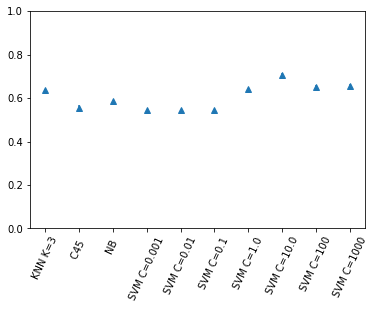

In [17]:
# it plots the mean and the standard deviation
plt.errorbar(models_df.id, models_df['mean'], models_df['standard_dev'], linestyle='None', marker='^')
plt.xticks(rotation=65)
#plt.grid(True)
plt.ylim((0,1))

(0, 1)

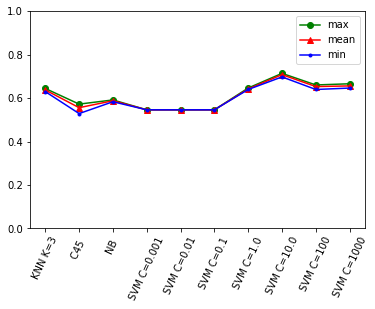

In [18]:
plt.plot(models_df.id, models_df['max'], marker = 'o', color='green')
plt.plot(models_df.id, models_df['mean'], marker = '^', color='red')
plt.plot(models_df.id, models_df['min'], marker = '.', color='blue')
plt.xticks(rotation=65)
plt.legend(('max', 'mean', 'min'))
#plt.grid(True)
plt.ylim((0,1))